In [36]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

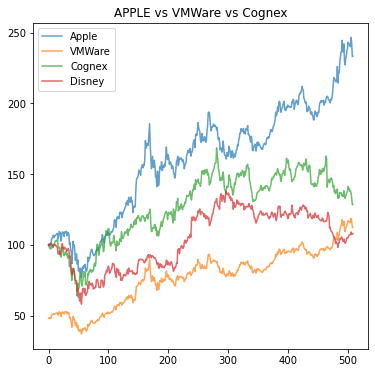

In [56]:
url = "aapl.csv"
apple_df=pd.read_csv(url,parse_dates=['Date'])

#print(df)
#plt.title("Apple")
#apple_df['Open'].plot()
#plt.show()

url = "VMW.csv"
vmware_df=pd.read_csv(url,parse_dates=['Date'])

url = "CGNX.csv"
cognex_df=pd.read_csv(url,parse_dates=['Date'])

url = "DIS.csv"
disney_df=pd.read_csv(url,parse_dates=['Date'])

fig,ax=plt.subplots(figsize=(6,6))
apple_df['Apple']=apple_df['Open'].div(apple_df['Open'].iloc[0]).mul(100)
apple_df['Apple'].plot(ax=ax,alpha=.7,label="Apple")

vmware_df['VMWARE']=apple_df['Open'].div(vmware_df['Open'].iloc[0]).mul(100)
vmware_df['VMWARE'].plot(ax=ax,alpha=.7,label="VMWare")

cognex_df['COGNEX']=cognex_df['Open'].div(cognex_df['Open'].iloc[0]).mul(100)
cognex_df['COGNEX'].plot(ax=ax,alpha=.7,label="Cognex")

disney_df['DISNEY']=disney_df['Open'].div(disney_df['Open'].iloc[0]).mul(100)
disney_df['DISNEY'].plot(ax=ax,alpha=.7,label="Disney")

plt.title("APPLE vs VMWare vs Cognex growth")
plt.legend()
plt.show()



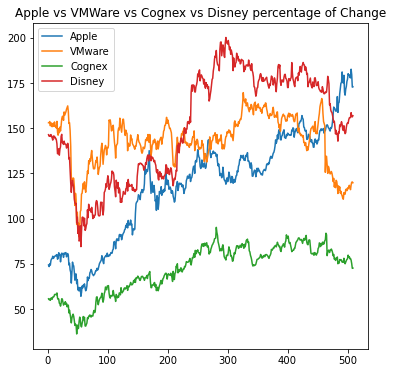

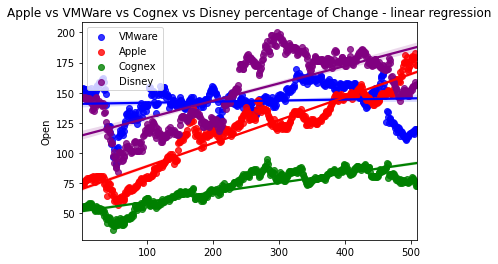

In [60]:
def stock_price_by_pct_chg(df):

    first_price=df['Open'].iloc[0]
    returns=df['Open'].pct_change()
    returns_plus_one = returns.add(1)
    accumulative=returns_plus_one.cumprod()
    accumulative=accumulative.mul(first_price)
    return accumulative

apple_accumulative=stock_price_by_pct_chg(apple_df)
vmware_accumulative=stock_price_by_pct_chg(vmware_df)
cognex_accumulative=stock_price_by_pct_chg(cognex_df)
disney_accumulative=stock_price_by_pct_chg(disney_df)

fig,ax=plt.subplots(figsize=(6,6))
apple_accumulative.plot(label='Apple',ax=ax)
vmware_accumulative.plot(label='VMware',ax=ax)
cognex_accumulative.plot(label='Cognex',ax=ax)
disney_accumulative.plot(label='Disney',ax=ax)
plt.title('Apple vs VMWare vs Cognex vs Disney percentage of Change')
plt.legend()
plt.show()


sns.regplot(x=np.asarray(vmware_accumulative.index).astype(float),y=vmware_accumulative,color='blue', label="VMware")
sns.regplot(x=np.asarray(apple_accumulative.index).astype(float),y=apple_accumulative,color='red',label="Apple")
sns.regplot(x=np.asarray(cognex_accumulative.index).astype(float),y=cognex_accumulative,color='green',label="Cognex")
sns.regplot(x=np.asarray(disney_accumulative.index).astype(float),y=disney_accumulative,color='purple',label="Disney")

plt.title('Apple vs VMWare vs Cognex vs Disney percentage of Change - linear regression')
plt.legend()
plt.show()

In [63]:
print(apple_accumulative.corr(vmware_accumulative))
print("apple price and vmware price are not correlated")

print(vmware_accumulative.corr(cognex_accumulative))
print("vmware and cognex are slightly correlated")

print(apple_accumulative.corr(disney_accumulative))
print("apple and disney are tightly correlated")

0.1077204338262036
apple price and vmware price are not correlated
0.3770893871395602
vmware and cognex are slightly correlated
0.7204575779467621
apple and disney are tightly correlated


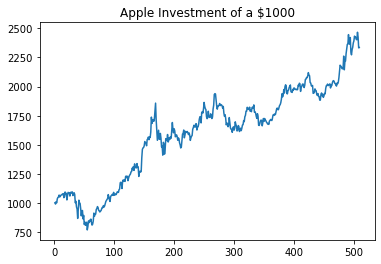

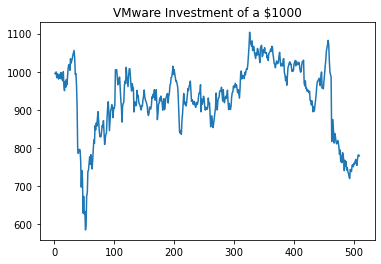

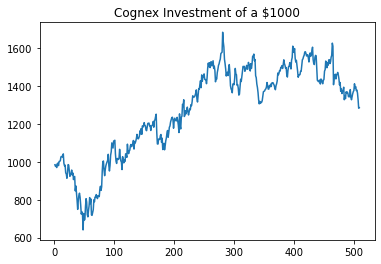

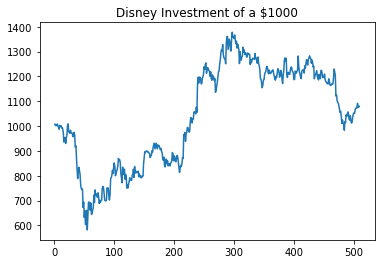

In [61]:
def return_calculate(df,investment,title):
    df_returns=df['Open'].pct_change()
    df_returns_plus_one = df_returns.add(1)
    df_cumulative_return = df_returns_plus_one.cumprod()
    df_cumulative_return.mul(investment).plot()
    plt.title(title)
    plt.show()
    
return_calculate(apple_df,1000,"Apple Investment of a $1000")
return_calculate(vmware_df,1000,"VMware Investment of a $1000")
return_calculate(cognex_df,1000,"Cognex Investment of a $1000")
return_calculate(disney_df,1000,"Disney Investment of a $1000")